In [1]:
import pandas as pd
df = pd.read_csv("spotify.csv")
df.head(), df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

(   Unnamed: 0                track_id                 artists  \
 0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
 1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
 2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
 3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
 4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
 
                                           album_name  \
 0                                             Comedy   
 1                                   Ghost (Acoustic)   
 2                                     To Begin Again   
 3  Crazy Rich Asians (Original Motion Picture Sou...   
 4                                            Hold On   
 
                    track_name  popularity  duration_ms  explicit  \
 0                      Comedy          73       230666     False   
 1            Ghost - Acoustic          55       149610     False   
 2              To Begin Again          57       21

In [8]:
import pandas as pd

df = pd.read_csv("spotify.csv")

# Drop any missing rows in important columns
df.dropna(subset=["popularity", "danceability", "energy", "valence", "tempo", "track_genre"], inplace=True)

# Optional: bucket popularity
df["pop_bucket"] = pd.cut(df["popularity"], bins=[0, 50, 80, 100], labels=["Low", "Mid", "High"])

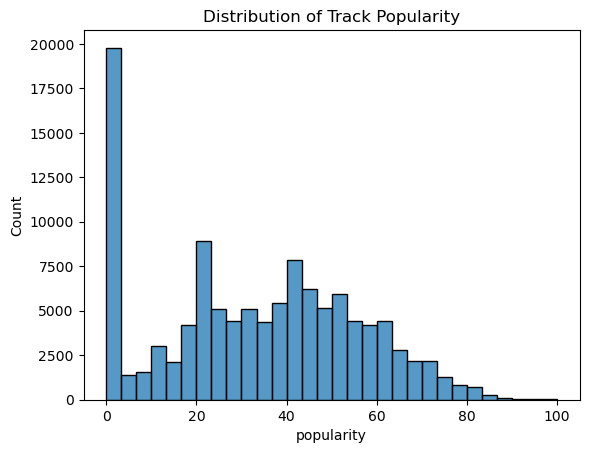

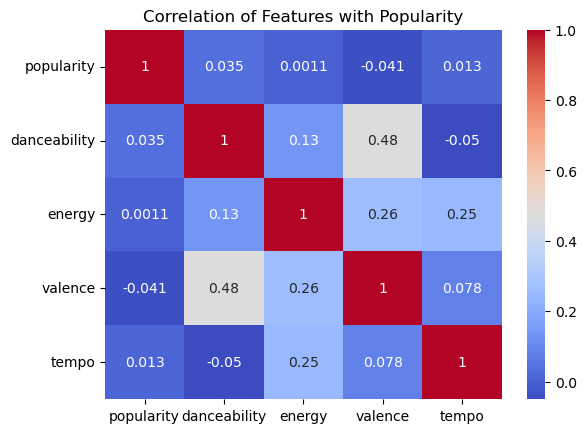

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Popularity distribution
sns.histplot(df["popularity"], bins=30)
plt.title("Distribution of Track Popularity")
plt.show()

# Correlation heatmap
features = ["popularity", "danceability", "energy", "valence", "tempo"]
sns.heatmap(df[features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation of Features with Popularity")
plt.show()

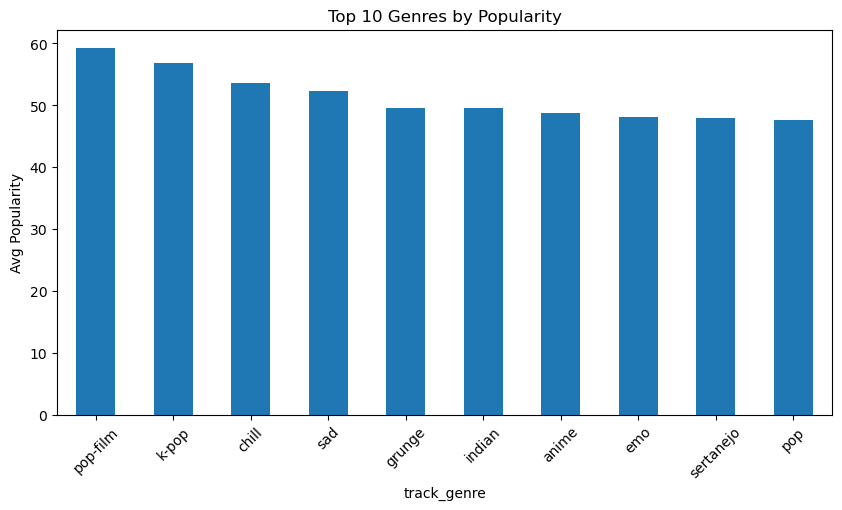

In [11]:
# Average popularity by genre
genre_pop = df.groupby("track_genre")["popularity"].mean().sort_values(ascending=False).head(10)
genre_pop.plot(kind="bar", title="Top 10 Genres by Popularity", ylabel="Avg Popularity", figsize=(10,5))
plt.xticks(rotation=45)
plt.show()